In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [61]:
# Case numbers
case_number = 2
version_number = 1
ifname = f"../results/inputfiles/test{case_number}.csv"
ofname = f"../results/outputs/out{case_number}_v{version_number}.csv"
ifcolumns = ["timestamp", "operation", "account", "amount", "duration"]
ofcolumns = [
    "timestamp",
    "totalParticipants",
    "averageMagnitude",
    "totalDeposited",
    "cumulative",
]
ONE_DAY = 24 * 3600
ONE_WEEK = ONE_DAY * 7
ONE_ETHER = 10**18

input_df = pd.read_csv(ifname, header=None)
input_df.columns = ifcolumns
output_df = pd.read_csv(ofname, header=None)
output_df.columns = ofcolumns
output_df["totalDeposited"] = output_df["totalDeposited"].apply(
    lambda x: int(x) / ONE_ETHER
)

Text(0, 0.5, 'Deposit amount')

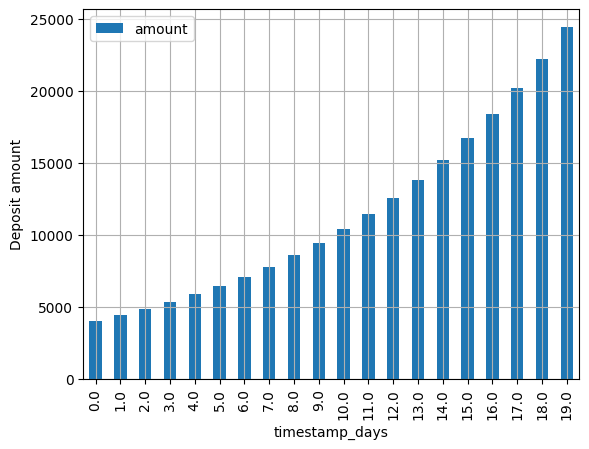

In [68]:
# Input processing
input_df["timestamp_days"] = (input_df["timestamp"] / ONE_DAY).floordiv(1)
# Input file
ax = input_df.plot(x="timestamp_days", y="amount", kind="bar")
ax.grid(True)
ax.set_ylabel("Deposit amount")

In [64]:
# Ouput processing
output_df["timestamp_days"] = (output_df["timestamp"] / ONE_DAY).floordiv(1)
output_df

,timestamp,totalParticipants,averageMagnitude,totalDeposited,cumulative,timestamp_days
0,1,1,1888854,4000.0,2493654,0.0
1,86401,2,1434755,8400.0,1058899,1.0
2,172801,3,1005550,13240.0,2064449,2.0
3,259201,4,530356,18564.0,2594805,3.0
4,345601,5,296632,24420.0,2298173,4.0
5,432001,6,222540,30862.0,2520713,5.0
6,518401,7,170801,37948.0,2349912,6.0
7,604801,8,149189,45742.0,2499101,7.0
8,691201,9,125367,54316.0,2373734,8.0
9,777601,10,114090,63747.0,2487824,9.0


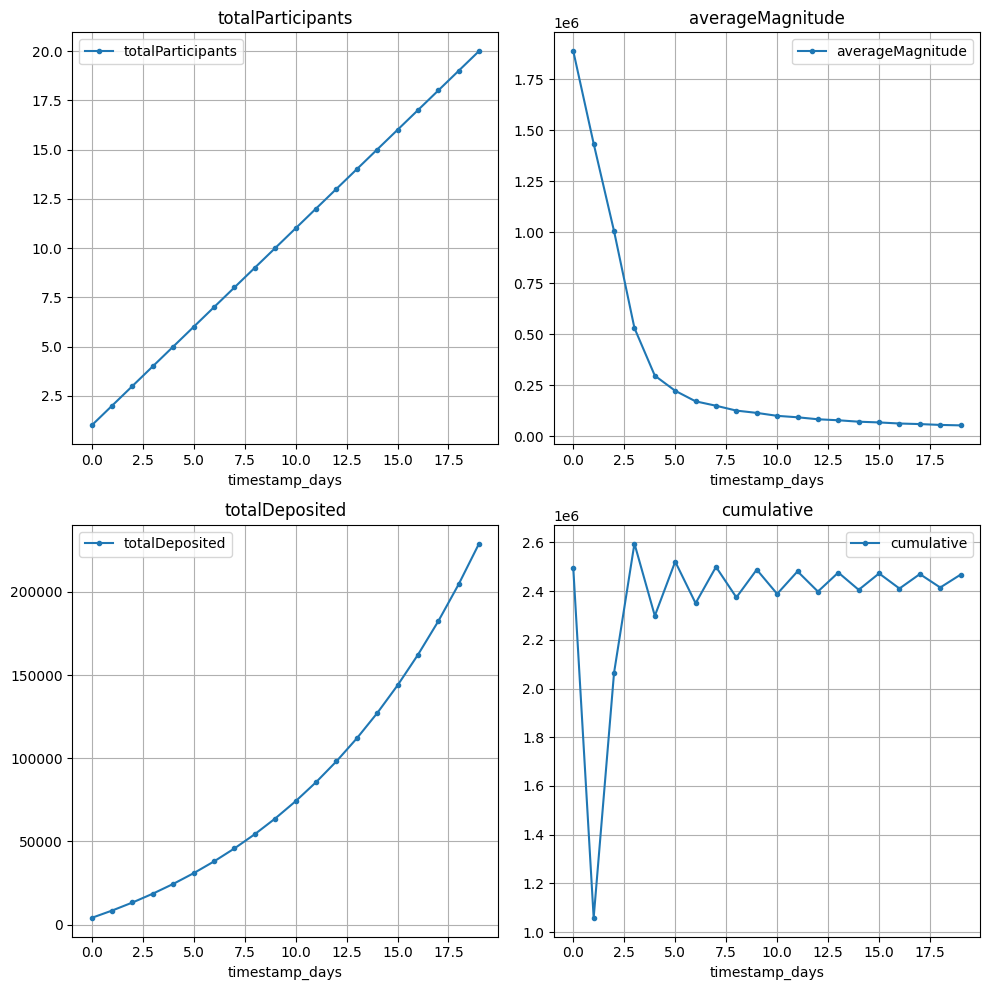

In [65]:
# # Output file
fig, axs = plt.subplots(2, 2, figsize=(10, 10))  # Creating a 2x2 grid of subplots

columns = ofcolumns[1:]

for ax, column in zip(axs.flatten(), columns):
    output_df.plot(x="timestamp_days", y=column, style=".-", ax=ax)
    ax.set_title(column)
    ax.grid(True)

plt.tight_layout()